In [2]:
# Import Statement

import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from PIL import Image
from scipy import misc
from scipy import ndimage

import cv2
np.set_printoptions(threshold=np.nan)

In [3]:
# Data Loading

train_x = np.load('../data/train_images.npy', encoding='latin1')
train_x = train_x[:,1]
train_y = pd.read_csv('../data/train_labels.csv', encoding='latin-1')
train_y = np.asarray(train_y['Category']) # To access labels: train_y[index]

test_x = np.load('../data/test_images.npy', encoding='latin1')
test_x = test_x[:,1]

print("Data loaded.")

Data loaded.


In [13]:
import numpy as np
label_dict = {"sink" : 0, "pear" : 1, "moustache" : 2, "nose" : 3,
    "skateboard" : 4, "penguin" : 5, "peanut" : 6, "skull" : 7, "panda" : 8,
    "paintbrush" : 9, "nail" : 10, "apple" : 11, "rifle" : 12,
    "mug" : 13, "sailboat" : 14, "pineapple" : 15, "spoon" : 16,
    "rabbit" : 17, "shovel" : 18, "rollerskates" : 19, "screwdriver" : 20,
    "scorpion" : 21, "rhinoceros" : 22, "pool" : 23, "octagon" : 24,
    "pillow" : 25, "parrot" : 26, "squiggle" : 27, "mouth" : 28, 
    "empty": 29, "pencil" : 30
}

labels= [0,1,2,3,4,5]

#categories: array {1,2,3,4,5,.... 31}
def one_hot_encoding(categories):
    # https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/
    num_classes= len(categories)
    #print(num_classes)
    # Return the maximum along a given axis.
    class_size= np.max(categories)
    # class_size+1: otherwise index out of bounds
    final_m= np.zeros((num_classes, class_size+1))
    for i in range(num_classes):
        #range = [0, numclasses-1]
        #print(categories[i])
        final_m[i, int(categories[i])]=1
    return final_m

print(one_hot_encoding(labels))

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [1]:
def numerical_y (y, dictionary):
    lst = []
    for i in y:
        lst.append(dictionary[i])
    return lst

numerical_y(train_y, label_dict)

NameError: name 'train_y' is not defined

# Playing with different image processing methods

In [5]:
# one test image
t = (train_x[0].reshape(100,100))

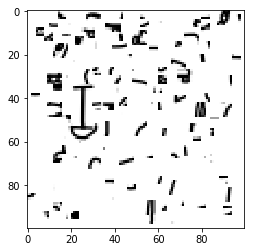

In [6]:
# original image
plt.imshow(t, cmap='Greys')
plt.show()

## a. Denoising (Median Blur, Gaussian Blur)

In [7]:
med_denoised = ndimage.median_filter(t, 3)
gauss_denoised = ndimage.gaussian_filter(t, 2)

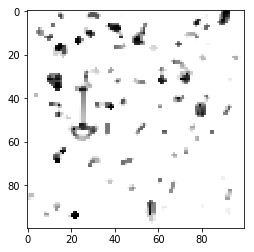

In [8]:
# Median Blur Denoising
plt.imshow(med_denoised, cmap='Greys')
plt.show()

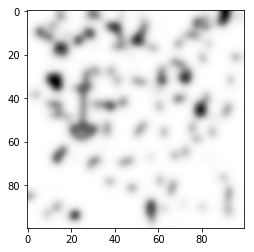

In [9]:
# Gaussian Blur Denoising
plt.imshow(gauss_denoised, cmap='Greys', interpolation='gaussian')
plt.show()

## b. Edge Detection

In [10]:
sx = ndimage.sobel(t, axis=0, mode='constant')
sy = ndimage.sobel(t, axis=1, mode='constant')
sob = np.hypot(sx, sy)

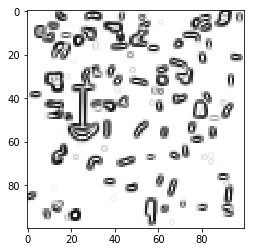

In [11]:
#plt.imshow(sob, cmap='Greys', interpolation='gaussian')
plt.imshow(sob, cmap='Greys', interpolation='nearest')
plt.show()

## c. Binary Erosion

In [12]:
open_square = ndimage.grey_opening(t)
eroded_square = ndimage.binary_erosion(t)
reconstruction = ndimage.binary_propagation(eroded_square, mask=t)

ValueError: size, footprint or structure must be specified

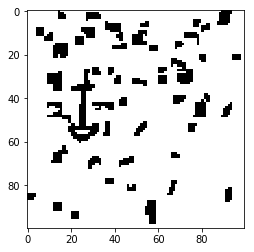

In [62]:
plt.imshow(reconstruction, cmap='Greys')
plt.show()

# Process Train Data 

## a. Image processing with the edge detection approach

In [121]:
def edge(data_x):
    new_data = []
    reshaped_data = []
    counter = 0
    for i in data_x:
        t = i.reshape(100,100)
        sx = ndimage.sobel(t, axis=0, mode='constant')
        sy = ndimage.sobel(t, axis=1, mode='constant')
        edge = np.hypot(sx, sy)
        new_data.append(edge)
        reshaped_data.append(edge.reshape(10000,1))
    new_data = np.asarray(new_data)
    reshaped_data = np.asarray(reshaped_data)
    return new_data, reshaped_data
        

In [122]:
train_edge_x_print, train_edge_x = edge(train_x)

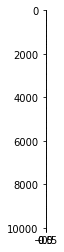

In [123]:
plt.imshow(train_edge_x[100], cmap='Greys')
plt.show()

## b. Binary Erosion

In [ ]:
def binary(data_x):
    new_data = []
    for i in data_x:
        tt = i.reshape(100,100)
        open_square = ndimage.binary_opening(t)
        eroded_square = ndimage.binary_erosion(t)
        new_data.append(ndimage.binary_propagation(eroded_square, mask=t))
    return np.asarray(new_data)

In [ ]:
train_binary_x = binary(train_x)

In [ ]:
plt.imshow(train_binary_x[100], cmap='Greys')
plt.show()

In [ ]:
label_dict = {"sink" : 0, "pear" : 1, "moustache" : 2, "nose" : 3,
    "skateboard" : 4, "penguin" : 5, "peanut" : 6, "skull" : 7, "panda" : 8,
    "paintbrush" : 9, "nail" : 10, "apple" : 11, "rifle" : 12,
    "mug" : 13, "sailboat" : 14, "pineapple" : 15, "spoon" : 16,
    "rabbit" : 17, "shovel" : 18, "rollerskates" : 19, "screwdriver" : 20,
    "scorpion" : 21, "rhinoceros" : 22, "pool" : 23, "octagon" : 24,
    "pillow" : 25, "parrot" : 26, "squiggle" : 27, "mouth" : 28, 
    "empty": 29, "pencil" : 30 }

In [ ]:
def numerical_y (y, dictionary):
    lst = []
    for i in y:
        lst.append(dictionary[i])
    return lst

numerical_y(train_y, label_dict)

# Support Vector Machine

In [114]:
clf = SVC()
clf.fit(train_edge_x, train_y)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [115]:
train_edge_x.shape

(10000, 10000, 1)

In [116]:
train_x.shape

(10000,)

## Neural Network 

In [ ]:
class model():
    #define obj
    def __init__(self, num_input_n, num_hidden_n, num_output_n): 
        """
            number inputs nodes
            number in hidden layers nodes
            number outputs nodes
        """
        
        #assign values to obj
        self.num_input_n= num_input_n
        self.num_output_n= num_output_n
        self.num_hidden_n= num_hidden_n
        
        #calculate weights
        #calculate num layers
        #calculate errors
    
    # cross Validation
    
    # feed forward
    
    # backpropagation
    
    #verify back propagation
    
    # softMax Function
    